OBS: EXECUTAR ESTE NOTEBOOK NO GOOGLE COLAB PARA EVITAR PROBLEMAS COM AS CONFIGURAÇÕES DO AMBIENTE DE EXECUÇÃO

In [11]:
import warnings
warnings.filterwarnings('ignore')

Instalando bibliotecas

In [2]:
# !pip uninstall pandas
# !pip install pycaret
# !pip install pyarrow

Importando bibliotecas

In [13]:
import pandas as pd
from pycaret.regression import *

Importando base de dados

In [8]:
df = pd.read_parquet(r'df_consolidado_sem_nulos.parquet')
df.head(3)

,period,bx_gse,by_gse,bz_gse,bt,density,speed,temperature,source,gse_x_satellite,gse_y_satellite,gse_z_satellite,smoothed_ssn,dst
date,,,,,,,,,,,,,,
1998-02-16,train_a,-5.55,3.00,1.25,6.80,1.53,383.920013,110237.0,ac,1522376.9,143704.6,149496.7,65.400002,-7.0
1998-04-01,train_a,-6.48,0.49,2.47,7.04,3.16,394.989990,25184.0,ac,1533530.2,-194457.0,52370.3,76.900002,-10.0
1998-05-01,train_a,1.84,-1.23,2.93,3.68,5.63,368.929993,95324.0,ac,1463828.7,-222119.8,-92433.4,80.800003,-1.0


Inicializando o ambiente de treinamento e criando o pipeline de transformações

In [9]:
setup = setup(df,
          target = 'dst',
          session_id = 42)

# Obtendo a lista de variaveis criadas na configuração do ambiente de treinamento
# get_config()

# Visualizando a variável dataset_transformed
# get_config('dataset_transformed')

,Description,Value
0,Session id,42
1,Target,dst
2,Target type,Regression
3,Original data shape,"(170, 14)"
4,Transformed data shape,"(170, 16)"
5,Transformed train set shape,"(118, 16)"
6,Transformed test set shape,"(52, 16)"
7,Numeric features,11
8,Categorical features,2
9,Preprocess,True


Removendo métricas de avaliação secundárias

In [21]:
remove_metric('MAE')
remove_metric('MSE')
remove_metric('RMSLE')
remove_metric('MAPE')
remove_metric('TT (Sec)')

Treinando e avaliando modelos com validação cruzada

In [22]:
best = compare_models()

,Model,RMSE,R2,TT (Sec)
huber,Huber Regressor,19.1730,-0.0648,0.0770
dummy,Dummy Regressor,21.2542,-0.3022,0.0750
rf,Random Forest Regressor,20.2795,-0.3695,0.2810
omp,Orthogonal Matching Pursuit,21.3476,-0.3891,0.0690
br,Bayesian Ridge,21.5798,-0.4853,0.0690
knn,K Neighbors Regressor,23.1258,-0.6266,0.0730
et,Extra Trees Regressor,21.5514,-0.6413,0.3290
lightgbm,Light Gradient Boosting Machine,22.4477,-0.7578,0.5040
ada,AdaBoost Regressor,23.0794,-0.8829,0.1720
en,Elastic Net,22.0166,-0.9450,0.0880


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

Obtendo o melhor modelo

In [72]:
best_model = automl()
best_model

HuberRegressor(alpha=0.5, epsilon=1.7)

Criando o modelo com melhor performace

In [ ]:
huber_model = create_model('huber')

,RMSE,R2
Fold,,
0,13.9244,0.3299
1,22.7450,-2.0749
2,9.7786,0.3737
3,57.7331,0.1151
4,15.0854,0.0173
5,7.0749,0.1257
6,10.1953,0.3703
7,32.5608,-0.2641
8,8.2305,0.3819


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Otimizando hiperparametros para obter o melhor RMSE

In [ ]:
tuned_huber_model, tuner = tune_model(huber_model,
                                      optimize="RMSE",
                                      return_tuner=True,
                                      n_iter=100,
                                      choose_better=True,
                                      early_stopping=True,
                                      # search_algorithm='random',
                                      search_algorithm='grid',
                                      )

,RMSE,R2
Fold,,
0,13.9552,0.3269
1,23.1914,-2.1968
2,9.0716,0.4610
3,57.7865,0.1134
4,14.7790,0.0568
5,7.2931,0.0709
6,10.1524,0.3756
7,31.2065,-0.1611
8,8.1860,0.3886


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


Obtendo hiperparametros do modelo otimizado

In [ ]:
tuned_huber_model

HuberRegressor(alpha=0.7, epsilon=1, fit_intercept=False)

Obtendo método de otimização dosm hiperparametros

In [ ]:
tuner

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(memory=Memory(location=None),
                                steps=[('numerical_imputer',
                                        TransformerWrapper(include=['bx_gse',
                                                                    'by_gse',
                                                                    'bz_gse',
                                                                    'bt',
                                                                    'density',
                                                                    'speed',
                                                                    'temperature',
                                                                    'gse_x_satellite',
                                                                    'gse_y_satellite',
                                                                    'gse_z_satellite',
                                                                    'smoothed_ssn'],
                                                           transformer=SimpleImputer())),
                                       ('categorical_i...
                                       ('actual_estimator', HuberRegressor())]),
             n_jobs=-1,
             param_grid={'actual_estimator__alpha': [1e-07, 1e-06, 0.0001,
                                                     0.001, 0.01, 0.0005, 0.005,
                                                     0.05, 0.1, 0.15, 0.2, 0.3,
                                                     0.4, 0.5, 0.7, 0.9],
                         'actual_estimator__epsilon': [1, 1.1, 1.2, 1.3, 1.35,
                                                       1.4, 1.5, 1.55, 1.6, 1.7,
                                                       1.8, 1.9],
                         'actual_estimator__fit_intercept': [True, False]},
             refit=False, scoring='neg_root_mean_squared_error', verbose=1)

Avaliando a performace do modelo selecionado

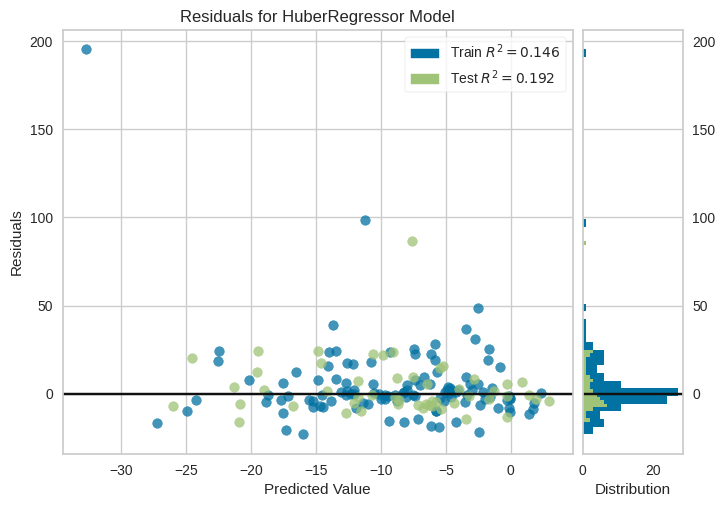

In [45]:
plot_model(tuned_huber_model, plot = 'residuals')

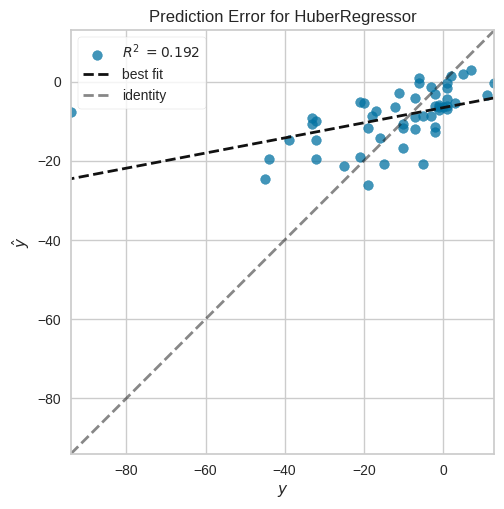

In [46]:
plot_model(tuned_huber_model, plot = 'error')

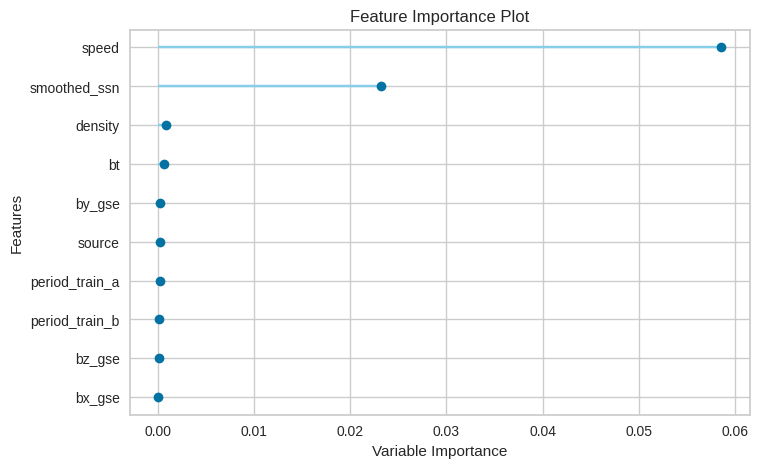

In [47]:
plot_model(tuned_huber_model, plot = 'feature')

In [48]:
evaluate_model(tuned_huber_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Realizando predições

In [49]:
pred = predict_model(tuned_huber_model)

,Model,RMSE,R2
0,Huber Regressor,16.0690,0.1920


Visualizando valores preditos

In [50]:
pred.head()

,period,bx_gse,by_gse,bz_gse,bt,density,speed,temperature,source,gse_x_satellite,gse_y_satellite,gse_z_satellite,smoothed_ssn,dst,prediction_label
date,,,,,,,,,,,,,,,
2008-01-01,train_c,-4.12,0.39,-1.89,4.55,2.32,367.670013,112767.0,ac,1387915.875,-92086.500000,141539.406250,6.600000,-12.0,-6.461893
2001-01-01,train_a,-4.40,-0.62,-2.00,4.87,4.94,294.059998,15261.0,ac,1521002.500,173612.593750,62641.398438,158.300003,-6.0,-0.288831
2006-04-01,train_c,-1.16,3.90,0.43,4.09,2.81,354.170013,46009.0,ac,1510943.250,241537.593750,-142559.000000,27.000000,-6.0,0.885624
2000-12-01,train_a,3.25,0.05,2.90,4.36,3.70,480.959991,240220.0,ac,1440426.125,240677.296875,-92374.898438,162.699997,-19.0,-11.762068
2008-06-01,train_c,-0.12,6.30,1.08,6.39,3.29,605.669983,263972.0,ac,1475089.250,-238723.093750,44565.800781,4.800000,-5.0,-20.913270


Salvando modelo gerado

In [51]:
save_model(tuned_huber_model, 'huber_regressor_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['bx_gse', 'by_gse', 'bz_gse', 'bt',
                                              'density', 'speed', 'temperature',
                                              'gse_x_satellite',
                                              'gse_y_satellite',
                                              'gse_z_satellite',
                                              'smoothed_ssn'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['period', 'source'],
                                     transformer=SimpleImpu...
                                     transformer=OrdinalEncoder(cols=['source'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'sourc

Exemplo de carregamento do pipeline salvo

In [53]:
loaded_huber_regressor_pipeline = load_model('huber_regressor_pipeline')
loaded_huber_regressor_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['bx_gse', 'by_gse', 'bz_gse', 'bt',
                                             'density', 'speed', 'temperature',
                                             'gse_x_satellite',
                                             'gse_y_satellite',
                                             'gse_z_satellite',
                                             'smoothed_ssn'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['period', 'source'],
                                    transformer...
                                    transformer=OrdinalEncoder(cols=['source'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'source',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': ac     0
ds     1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['period'],
                                    transformer=OneHotEncoder(cols=['period'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 HuberRegressor(alpha=0.7, epsilon=1, fit_intercept=False))])

In [67]:
# !pip install explainerdashboard
# !pip install pycaret[analysis]
# from pycaret.regression import dashboard

# dashboard(tuned_huber_model, display_format ='inline')

In [63]:
# !pip install pycaret[mlops] # Instala o pycaret com os extras 'mlops', que incluem o gradio
# from pycaret.regression import create_app

# create_app(tuned_huber_model) # Chama create_app após instalar as dependências necessárias